# London Weather: Resampling Datetime Data

## Import Necessary Libraries

In [1]:
# Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

# Permanently changes the pandas settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 7)

from sklearn import set_config
set_config(display='diagram')

# display values with two decimal places and comma separation for powers of thousands.
pd.set_option('display.float_format', lambda x: f"{x:,.2f}")

## Load the Data

In [2]:
# Import the data
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv'
df_OE = pd.read_csv(url)
df_OE.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [3]:
df = df_OE.copy()

## Prepare DataFrame

In [4]:
# Convert the date column to datetime dtype
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
           ...    
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

In [5]:
# Set the date column as the index
df = df.set_index('date')
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

In [6]:
# Filter data: keep only data from the year 2000 or later
df = df.loc['2000':'2020']
display(df.head(2))
display(df.tail(2))

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2000-01-01,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00
2000-01-02,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
2020-12-30,6.00,0.40,22.00,5.60,2.70,-0.10,0.00,"100,200.00",NaN
2020-12-31,7.00,1.30,34.00,1.50,-0.80,-3.10,0.00,"100,500.00",NaN


In [7]:
# Keep only the following features:
# 'precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth'
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
display(df.head(2))
display(df.tail(2))

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2020-12-30,0.00,2.70,-0.10,5.60,NaN
2020-12-31,0.00,-0.80,-3.10,1.50,NaN


## Impute any Missing Values

In [8]:
# Check 'precipitation' for null values
df['precipitation'].isna().sum()

390

In [9]:
# Interpolate the missing values
df['precipitation'] = df['precipitation'].interpolate()
df['precipitation'].head()

date
2000-01-01   0.00
2000-01-02   0.20
2000-01-03   6.00
2000-01-04   0.20
2000-01-05   0.80
Name: precipitation, dtype: float64

In [10]:
# Check 'precipitation' for null values, again
df['precipitation'].isna().sum()

0

In [11]:
# Check 'mean_temp' for null values
df['mean_temp'].isna().sum()

419

In [12]:
# Interpolate the missing values
df['mean_temp'] = df['mean_temp'].interpolate()
df['mean_temp'].head()

date
2000-01-01   7.00
2000-01-02   7.90
2000-01-03   9.40
2000-01-04   7.00
2000-01-05   6.40
Name: mean_temp, dtype: float64

In [13]:
# Check 'mean_temp' for null values, again
df['mean_temp'].isna().sum()

0

In [14]:
# Check 'min_temp' for null values
df['min_temp'].isna().sum()

386

In [15]:
# Interpolate the missing values
df['min_temp'] = df['min_temp'].interpolate()
df['min_temp'].head()

date
2000-01-01   4.90
2000-01-02   5.00
2000-01-03   7.20
2000-01-04   4.40
2000-01-05   1.90
Name: min_temp, dtype: float64

In [16]:
# Check 'min_temp' for null values, again
df['min_temp'].isna().sum()

0

In [17]:
# Check 'max_temp' for null values
df['max_temp'].isna().sum()

390

In [18]:
# Interpolate the missing values
df['max_temp'] = df['max_temp'].interpolate()
df['max_temp'].head()

date
2000-01-01   10.80
2000-01-02   11.50
2000-01-03    9.50
2000-01-04   11.00
2000-01-05   10.80
Name: max_temp, dtype: float64

In [19]:
# Check 'max_temp' for null values, again
df['max_temp'].isna().sum()

0

In [20]:
# Check 'snow_depth' for null values
df['snow_depth'].isna().sum()

1752

In [21]:
# 'snow_depth' should not be interpolated, as there are many days with the missing values, 
# as it did not snow those days. We will impute missing values as 'zero'
df['snow_depth'] = df['snow_depth'].fillna(0)
df['snow_depth'].head()

date
2000-01-01   0.00
2000-01-02   0.00
2000-01-03   0.00
2000-01-04   0.00
2000-01-05   0.00
Name: snow_depth, dtype: float64

In [22]:
# Check 'snow_depth' for null values, again
df['snow_depth'].isna().sum()

0

## Visualizations

### Q1: What month had the most precipitation between 2000 and 2010?

In [23]:
# Create temporary df to work with between 2000-2010
df_prec = df.loc['2000':'2010']['precipitation']
df_prec

date
2000-01-01   0.00
2000-01-02   0.20
2000-01-03   6.00
             ... 
2010-12-29   1.40
2010-12-30   0.00
2010-12-31   0.00
Name: precipitation, Length: 4018, dtype: float64

In [24]:
# Resample the data as Monthly frequency
df_prec_res = df_prec.resample('MS').sum()
df_prec_res.name = 'Precipitation for 2000-2010'
df_prec_res

date
2000-01-01   14.50
2000-02-01   64.80
2000-03-01   13.90
              ... 
2010-10-01   63.10
2010-11-01   32.00
2010-12-01   21.30
Freq: MS, Name: Precipitation for 2000-2010, Length: 132, dtype: float64

In [25]:
# Show first day of month with maximum monthly average precipitation
max_prec = df_prec_res.idxmax()
max_prec

Timestamp('2000-10-01 00:00:00', freq='MS')

In [26]:
# Show average amount of rain per day in that month
df_prec_res.loc[max_prec]

152.7

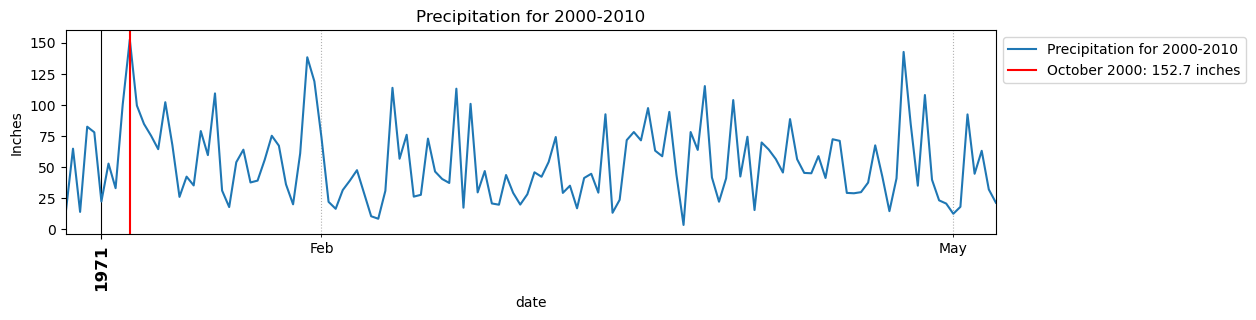

In [30]:
# Plot: Between 2000-2010, the maximum monthly average precipitation

# create the locator to place ticks every 3 months.
loc_3months = mdates.MonthLocator(interval=3)
fmt_months = mdates.DateFormatter("%b")

## for major year ticks
loc_year = mdates.YearLocator()
fmt_year = mdates.DateFormatter("%Y")

##  Make the fig and axis first
#  plot the time series with pandas
fig, ax = plt.subplots(figsize=(12,3))
df_prec_res.plot(ax=ax, title= 'Precipitation for 2000-2010', ylabel= 'Inches');

# Set xticks and xticklabels 
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), fontsize='large', fontweight='bold')

##  customize minor ticks
ax.xaxis.set_minor_locator(loc_3months)
ax.xaxis.set_minor_formatter(fmt_months)

##  customize major ticks
ax.xaxis.set_major_locator(loc_year)
ax.xaxis.set_major_formatter(fmt_year)

##  Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

# Plot vertical line for year with max precipitation value
ax.axvline(max_prec, color='red', label=f'{max_prec.strftime("%B %Y")}: {df_prec_res.loc[max_prec]} inches')

fig = ax.get_figure()
fig.autofmt_xdate(rotation=90,ha='center')

# plot legend
ax.legend(bbox_to_anchor=[1,1]);

### Q2: Which year between 2000-2020 had the coolest average temperature?

In [ ]:
# Create temporary df to work with: Looking for an average temperature: 'mean_temp'
df_temp = df.loc['2000':'2020']['mean_temp']
df_temp

In [ ]:
# Resample the data as Yearly frequency
df_temp_res = df_temp.resample('AS').mean()
df_temp_res.name = 'Average Temperature Resampled'
df_temp_res

In [ ]:
# Show year with coolest average temperature
min_temp = df_temp_res.idxmin()
display(min_temp)
print(f'The lowest average yearly temperature was in the year {min_temp.strftime("%Y")}.')

In [ ]:
# Show temperature of that year
df_temp_res.loc[min_temp]

In [ ]:
# Plot
fig, ax = plt.subplots(figsize=(12,3))
df_temp_res.plot(ax=ax, title= 'Average Temperature', ylabel= 'Degrees',
                label='Average Yearly Temperature');

## create the locator for minor year ticks every year
fmt_year = mdates.DateFormatter("%Y") 
loc_year = mdates.YearLocator()

##  customize minor ticks
ax.xaxis.set_minor_formatter(fmt_year) 
ax.xaxis.set_minor_locator(loc_year)


## create the locator for major year ticks every 5 years
fmt_year5 = mdates.DateFormatter("%Y")
loc_year5 = mdates.YearLocator( #interval=5  ## "interval" not recognized.
                                )

##  customize major ticks
ax.xaxis.set_major_locator(loc_year5)
ax.xaxis.set_major_formatter(fmt_year5)

##  Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')
fig.autofmt_xdate(rotation=90,ha='center')

# Plot vertical line for year with coolest average temperature
ax.axvline(min_temp, color='red', label=f'{min_temp.strftime("%Y")}: {df_temp_res.loc[min_temp]:.2f}°')

# plot legend
ax.legend(bbox_to_anchor=[1,1]);